SPATIAL CONVOLUTION

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

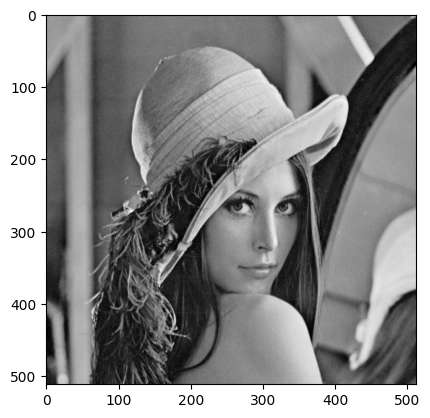

In [49]:
img=cv2.imread("lena.tiff",0)
plt.imshow(img, cmap='gray')
plt.show()

In [22]:
def convolution(obj,filter):
  filter=np.rot90(filter,2)
  val=filter.shape[0]
  val=math.floor(val/2)
  #print(val)
  #print(filter)
  pim=np.pad(obj,(val,val),'constant')
  newim=np.zeros(obj.shape)
  for i in range(val,pim.shape[0]-(val*2)):
    for j in range(val,pim.shape[1]-(val*2)):
      sim=pim[i-val:i+(val+1),j-val:j+(val+1)]
      response = np.sum(sim*filter)
      newim[i-1,j-1]=int(response)
  return newim

In [23]:
# Gaussian kernel
kernel3=np.array([[1,2,1],
[2,4,2],
[1,2,1]])
kernel3= kernel3 * (1/16)
print(kernel3)

#Gaussian Blur
gauss_blur=cv2.GaussianBlur(img,(7,7),0)

gauss_mask=img-gauss_blur
gauss_mask= gauss_mask.astype(np.uint8)

# Sharpening by real image + k*Mask; where k>0
unsharp_img=img+(gauss_mask * 1)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


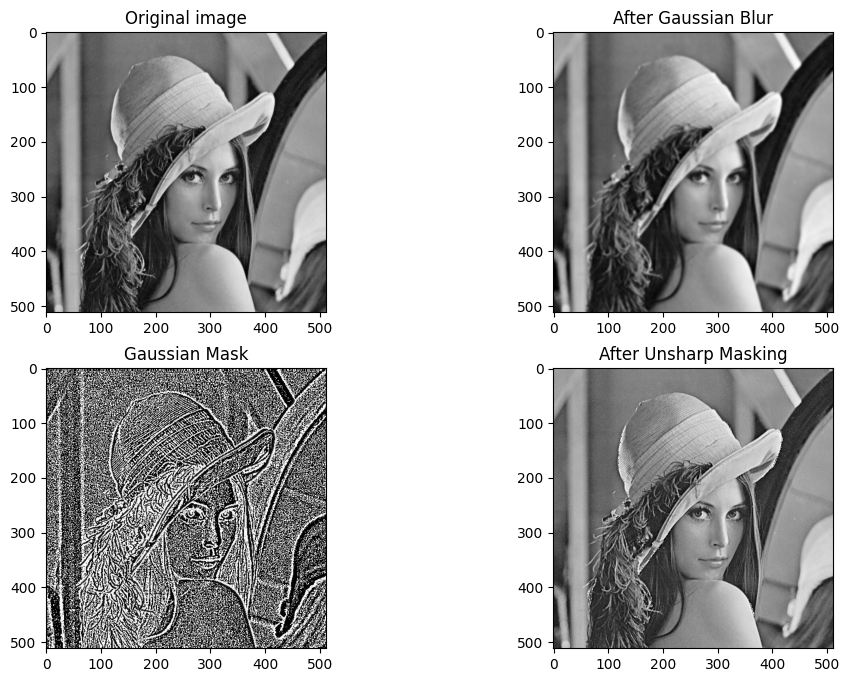

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title("Original image")
plt.imshow(img, cmap='gray')
plt.subplot(2,2,2)
plt.title("After Gaussian Blur")
plt.imshow(gauss_blur, cmap='gray')
plt.subplot(2,2,3)
plt.title("Gaussian Mask")
plt.imshow(gauss_mask, cmap='gray')
plt.subplot(2,2,4)
plt.title("After Unsharp Masking")
plt.imshow(np.clip(unsharp_img, 0, 255), cmap='gray')
plt.show()

In [25]:
#kernel for LAPLACIAN
kernel1=np.array([[0,1,0],[1,-4,1],[0,1,0]])
kernel2=np.array([[1,1,1],[1,-8,1],[1,1,1]])
print(kernel1)
print(kernel2)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]
[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


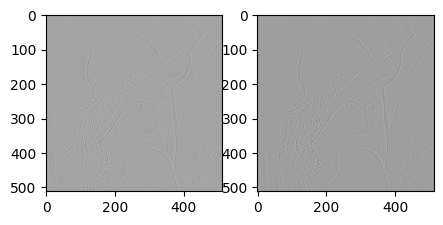

In [26]:
laplacian_4=convolution(img,kernel1)
laplacian_8=convolution(img,kernel2)
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
plt.imshow(laplacian_4, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(laplacian_8, cmap='gray')
plt.show()

In [27]:
im1 = img + (laplacian_4*(-1))
im2 = img + (laplacian_8*(-1))

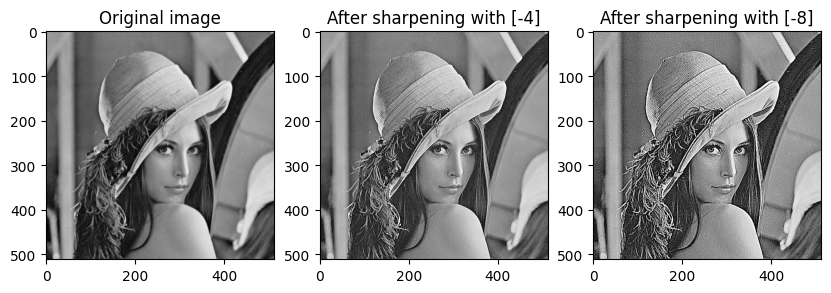

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.title("After sharpening with [-4]")
plt.imshow(np.clip(im1, 0, 255), cmap='gray')
plt.subplot(1,3,3)
plt.title("After sharpening with [-8]")
plt.imshow(np.clip(im2, 0, 255), cmap='gray')
plt.show()

In [29]:
sobelx=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobely=sobelx.T
print(sobelx)
print(sobely)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


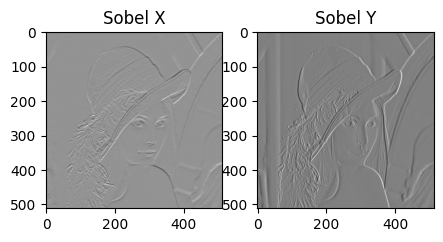

In [40]:
x_image=convolution(img,sobelx)
y_image=convolution(img,sobely)
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
plt.title("Sobel X")
plt.imshow(x_image, cmap='gray')
plt.subplot(1,2,2)
plt.title("Sobel Y")
plt.imshow(y_image, cmap='gray')
plt.show()

In [41]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 10*np.log(np.abs(fshift))

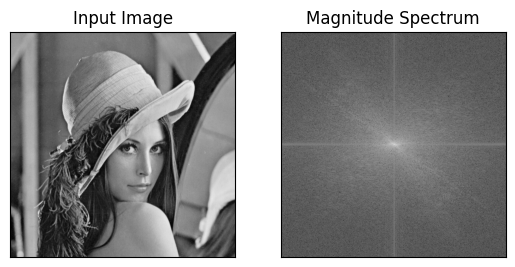

In [42]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [43]:
mag = np.abs(x_image) + np.abs(y_image)

In [44]:
f = np.fft.fft2(mag)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 10*np.log(np.abs(fshift))

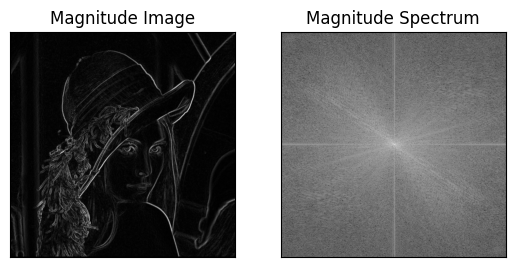

In [48]:
plt.subplot(121),plt.imshow(mag, cmap = 'gray')
plt.title('Magnitude Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

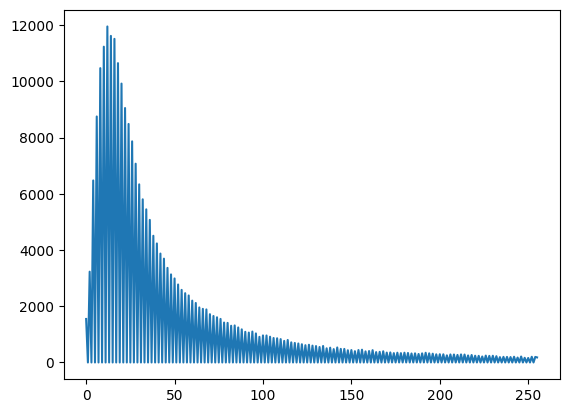

In [50]:
hist = np.histogram(mag.flatten(),256,[0,256])
plt.plot(hist[1][0:-1],hist[0])
plt.show()